
## Load all  necessary functions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential, save_model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2



## Dataset splitting and Augmentation

In [ ]:
#Visualization
def plot_figs(X,Y,size=(10,10),subplots_dim=(2,5)):
  fig,ax= plt.subplots(subplots_dim[0],subplots_dim[1])
  fig.set_size_inches(size)
  k=0
  for i in range(subplots_dim[0]):
    for j in range(subplots_dim[1]):
      ax[i,j].imshow(X[k].reshape((28,28)),cmap="gray")
      ax[i,j].set_title('gesture'+str(np.argmax(Y[k])))
      k +=1
    plt.tight_layout()

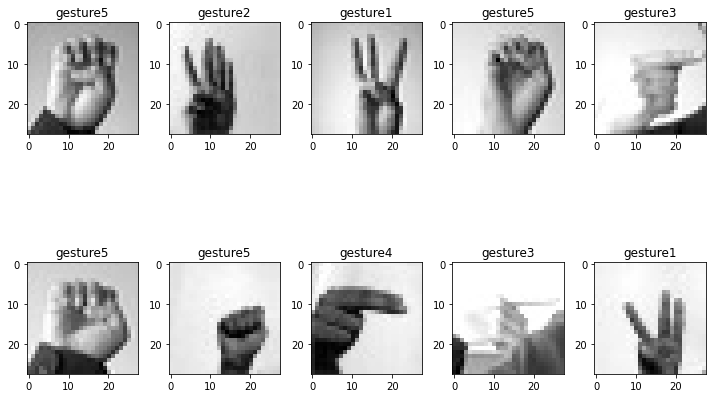

In [ ]:
plot_figs(X_train,Y_train,size=(10,10),subplots_dim=(2,5))

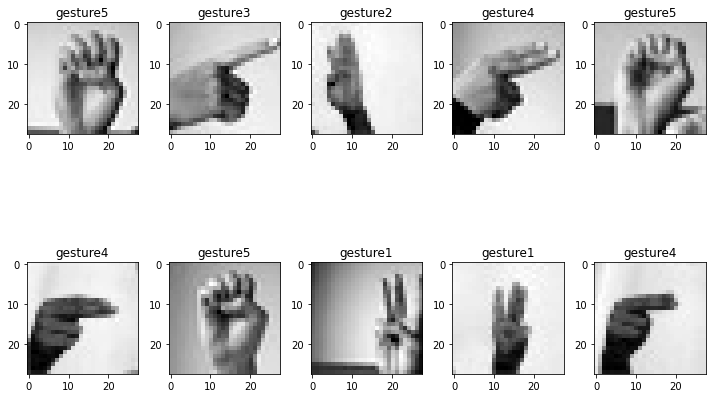

In [ ]:
plot_figs(X_valid,Y_valid,size=(10,10),subplots_dim=(2,5))

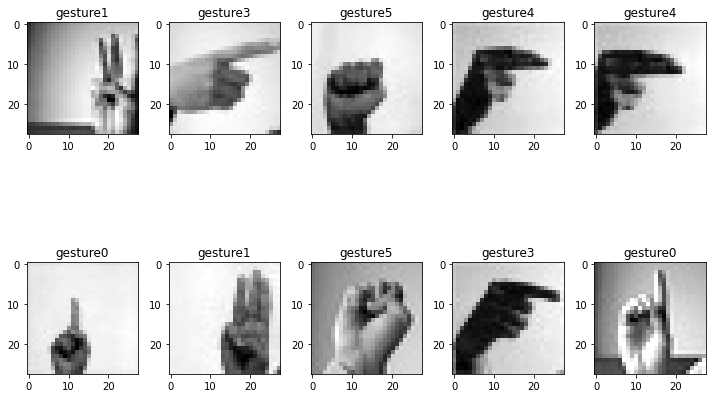

In [ ]:
plot_figs(X_test,Y_test,size=(10,10),subplots_dim=(2,5))

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=20,  
        zoom_range = 0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False) 


datagen.fit(X_train)

## Model Building and Summary

In [ ]:


model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(BatchNormalization())
model.add(Dense(categories, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 5, 5, 64)          256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

## Model Training


In [ ]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=10) ,epochs = 50, validation_data = (X_valid, Y_valid),verbose=1)

Epoch 1/50
1051/1051 [==============================] - 13s 11ms/step - loss: 1.0854 - accuracy: 0.5750 - val_loss: 1.2251 - val_accuracy: 0.5560
Epoch 2/50
1051/1051 [==============================] - 12s 11ms/step - loss: 0.6401 - accuracy: 0.7575 - val_loss: 0.4093 - val_accuracy: 0.8522
Epoch 3/50
1051/1051 [==============================] - 11s 11ms/step - loss: 0.4977 - accuracy: 0.8162 - val_loss: 0.5328 - val_accuracy: 0.8233
Epoch 4/50
1051/1051 [==============================] - 12s 11ms/step - loss: 0.4230 - accuracy: 0.8443 - val_loss: 0.2103 - val_accuracy: 0.9238
Epoch 5/50
1051/1051 [==============================] - 12s 11ms/step - loss: 0.3790 - accuracy: 0.8547 - val_loss: 0.4671 - val_accuracy: 0.8462
Epoch 6/50
1051/1051 [==============================] - 11s 11ms/step - loss: 0.3470 - accuracy: 0.8732 - val_loss: 0.1461 - val_accuracy: 0.9452
Epoch 7/50
1051/1051 [==============================] - 12s 11ms/step - loss: 0.3364 - accuracy: 0.8785 - val_loss: 0.3030 -

## Model Performance Testing

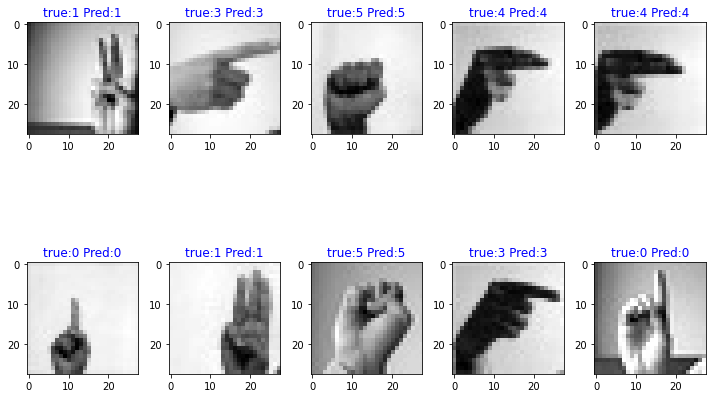

In [ ]:
plot_test(X_test,Y_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,predictions.round())*100

97.86747905559787

In [ ]:
print(classification_report(predictions.round(), Y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       228
           1       0.99      0.95      0.97       238
           2       0.91      0.99      0.95       200
           3       0.99      0.96      0.97       217
           4       1.00      0.99      0.99       188
           5       0.99      1.00      0.99       241

   micro avg       0.98      0.98      0.98      1312
   macro avg       0.98      0.98      0.98      1312
weighted avg       0.98      0.98      0.98      1312
 samples avg       0.98      0.98      0.98      1312



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_loss, test_acc = model.evaluate(X_test,Y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

42/42 [==============================] - 0s 5ms/step - loss: 0.0642 - accuracy: 0.9794
Test accuracy: 97.94%
